# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_essay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [26]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [27]:
data.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


In [28]:
data.describe()

,teacher_number_of_previously_posted_projects,project_is_approved,price
count,109248.000000,109248.000000,109248.000000
mean,11.153165,0.848583,298.119343
std,27.777154,0.358456,367.498030
min,0.000000,0.000000,0.660000
25%,0.000000,1.000000,104.310000
50%,2.000000,1.000000,206.220000
75%,9.000000,1.000000,379.000000
max,451.000000,1.000000,9999.000000


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split

y = data['project_is_approved']
X = data.drop('project_is_approved',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)
print(X_train.shape,X_cv.shape,X_test.shape,y_train.shape,y_cv.shape,y_test.shape)

(65548, 8) (21850, 8) (21850, 8) (65548,) (21850,) (21850,)


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow = CountVectorizer(ngram_range=(1,4),max_df=10,max_features=10000)
vectorizer_bow.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer_bow.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_bow.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_bow.transform(X_test['essay'].values)

    print('After Vectorization')
    print('='*50)
    print(X_train_essay_bow.shape, y_train.shape)
    print(X_cv_essay_bow.shape, y_cv.shape)
    print(X_test_essay_bow.shape, y_test.shape)
    print('='*50)
    print(vectorizer_bow.get_feature_names()[:10])

After Vectorization
(65548, 10000) (65548,)
(21850, 10000) (21850,)
(21850, 10000) (21850,)
['10 000 steps', '10 blocks', '10 hours', '10 weeks', '108', '12 self', '12 self contained', '12 self contained classroom', '12 serious', '12th grade english']


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# encoding categorical features
    
# encoding school_state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state = vectorizer.transform(X_train['school_state'].values)
X_test_state = vectorizer.transform(X_test['school_state'].values)
X_cv_state = vectorizer.transform(X_cv['school_state'].values)

print(vectorizer.get_feature_names()[:5])

# encoding teacher_prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_teacher_prefix = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer.transform(X_test['teacher_prefix'].values)
X_cv_teacher_prefix = vectorizer.transform(X_cv['teacher_prefix'].values)

print(vectorizer.get_feature_names()[:5])

# encoding project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_train_project_grade_category = vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category= vectorizer.transform(X_test['project_grade_category'].values)
X_cv_project_grade_category = vectorizer.transform(X_cv['project_grade_category'].values)

# encoding clean_categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_clean_categories = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories = vectorizer.transform(X_test['clean_categories'].values)
X_cv_clean_categories = vectorizer.transform(X_cv['clean_categories'].values)

print(vectorizer.get_feature_names()[:5])

# encoding clean_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_clean_subcategories = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories = vectorizer.transform(X_test['clean_subcategories'].values)
X_cv_clean_subcategories = vectorizer.transform(X_cv['clean_subcategories'].values)

print(vectorizer.get_feature_names()[:5])

['ak', 'al', 'ar', 'az', 'ca']
['dr', 'mr', 'mrs', 'ms', 'teacher']
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language']
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep']


In [7]:
# encoding numerical features
# encoding price

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)

print(X_cv_price_norm[:10])

# encoding teacher_number_of_previously_posted_projects

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

print('='*25)
print(X_train_teacher_number_of_previously_posted_projects_norm[:10])

[[0.00326906]
 [0.00195115]
 [0.00421245]
 [0.00030863]
 [0.00272941]
 [0.00202338]
 [0.00456698]
 [0.00014115]
 [0.00181703]
 [0.00149462]]
[[0.        ]
 [0.00039161]
 [0.00156642]
 [0.00169696]
 [0.00287177]
 [0.00430766]
 [0.00926799]
 [0.0022191 ]
 [0.00117482]
 [0.00274124]]


In [8]:
# concatenating all features
from scipy.sparse import hstack

X_tr = hstack((X_train_essay_bow,X_train_state,X_train_teacher_prefix,X_train_project_grade_category,X_train_clean_categories,X_train_clean_subcategories,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_crv = hstack((X_cv_essay_bow,X_cv_state,X_cv_teacher_prefix,X_cv_project_grade_category,X_cv_clean_categories,X_cv_clean_subcategories,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_state,X_test_teacher_prefix,X_test_project_grade_category,X_test_clean_categories,X_test_clean_subcategories,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print('='*50)
print(X_tr.shape, y_train.shape)
print(X_crv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(65548, 10101) (65548,)
(21850, 10101) (21850,)
(21850, 10101) (21850,)


In [9]:
import pickle

pickle_out = open("BOW_data.pickle","wb")
pickle.dump({'X_tr':X_tr,'X_crv':X_crv,'X_te':X_te,'y_tr':y_train,'y_crv':y_cv,'y_te':y_test},pickle_out)
pickle_out.close()

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [10]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.06it/s]


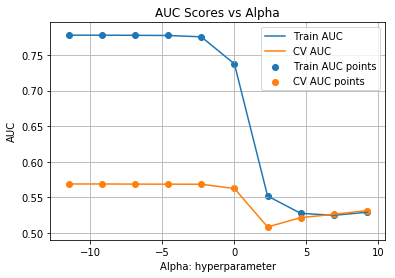

In [12]:
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
train_auc = []
cv_auc = []
for alpha in tqdm(alphas):
    clf = MultinomialNB(alpha=alpha, class_prior=[0.5,0.5])
    clf.fit(X_tr, y_train)

    y_train_pred = batch_predict(clf, X_tr)    
    y_cv_pred = batch_predict(clf, X_crv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(np.log(alphas), train_auc, label='Train AUC')
plt.plot(np.log(alphas), cv_auc, label='CV AUC')

plt.scatter(np.log(alphas), train_auc, label='Train AUC points')
plt.scatter(np.log(alphas), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC Scores vs Alpha")
plt.grid()
plt.show()

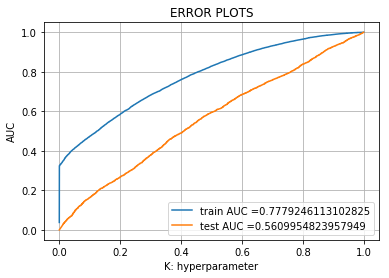

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

clf = MultinomialNB(alpha=0.00001, class_prior=[0.5,0.5]) #AUC score for cv is highest at 0.00001
clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X_tr)    
y_test_pred = batch_predict(clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [14]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print('='*50)
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print('Accuracy Score: ',accuracy_score(y_train, predict_with_best_t(y_train_pred, best_t)))
print('='*50)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print('Accuracy Score: ',accuracy_score(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4790028643262344 for threshold 0.479
Train confusion matrix
[[ 7255  2670]
 [19174 36449]]
Accuracy Score:  0.6667480319765668
Test confusion matrix
[[ 1552  1756]
 [ 7137 11405]]
Accuracy Score:  0.5929977116704805


In [16]:
y = data['project_is_approved']
X = data.drop('project_is_approved',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)
print(X_train.shape,X_cv.shape,X_test.shape,y_train.shape,y_cv.shape,y_test.shape)

(65548, 8) (21850, 8) (21850, 8) (65548,) (21850,) (21850,)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_names = [] # to store all the features

tfidf_Vectorizer = TfidfVectorizer(ngram_range=(1,4),max_df=10,max_features=10000)
tfidf_Vectorizer.fit(X_train['essay'].values)

X_train_essay_tfidf = tfidf_Vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = tfidf_Vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = tfidf_Vectorizer.transform(X_test['essay'].values)

print('After Tfidf Vectorization')
print('='*50)
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print('='*50)

print(tfidf_Vectorizer.get_feature_names()[:10])
feature_names.extend(tfidf_Vectorizer.get_feature_names())

After Tfidf Vectorization
(65548, 10000) (65548,)
(21850, 10000) (21850,)
(21850, 10000) (21850,)
['10 000 steps', '10 copies', '100th day school', '12 serious', '16 17', '16 school year', '17th', '18 boys', '18 children', '18 kindergarten']


In [18]:
# encoding categorical features using tfidf vectorizer
    
# encoding school_state
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state = vectorizer.transform(X_train['school_state'].values)
X_test_state = vectorizer.transform(X_test['school_state'].values)
X_cv_state = vectorizer.transform(X_cv['school_state'].values)

print(vectorizer.get_feature_names()[:5])
feature_names.extend(vectorizer.get_feature_names())

# encoding teacher_prefix
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_teacher_prefix = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer.transform(X_test['teacher_prefix'].values)
X_cv_teacher_prefix = vectorizer.transform(X_cv['teacher_prefix'].values)

print(vectorizer.get_feature_names()[:5])
feature_names.extend(vectorizer.get_feature_names())

# encoding project_grade_category
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_train_project_grade_category = vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category= vectorizer.transform(X_test['project_grade_category'].values)
X_cv_project_grade_category = vectorizer.transform(X_cv['project_grade_category'].values)

print(vectorizer.get_feature_names()[:5])
feature_names.extend(vectorizer.get_feature_names())

# encoding clean_categories
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_clean_categories = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories = vectorizer.transform(X_test['clean_categories'].values)
X_cv_clean_categories = vectorizer.transform(X_cv['clean_categories'].values)

print(vectorizer.get_feature_names()[:5])
feature_names.extend(vectorizer.get_feature_names())


# encoding clean_subcategories
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_clean_subcategories = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories = vectorizer.transform(X_test['clean_subcategories'].values)
X_cv_clean_subcategories = vectorizer.transform(X_cv['clean_subcategories'].values)

print(vectorizer.get_feature_names()[:5])
feature_names.extend(vectorizer.get_feature_names())


['ak', 'al', 'ar', 'az', 'ca']
['dr', 'mr', 'mrs', 'ms', 'teacher']
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language']
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep']


In [19]:
X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_state,X_train_teacher_prefix,X_train_project_grade_category,X_train_clean_categories,X_train_clean_subcategories,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_crv_tfidf = hstack((X_cv_essay_tfidf,X_cv_state,X_cv_teacher_prefix,X_cv_project_grade_category,X_cv_clean_categories,X_cv_clean_subcategories,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf,X_test_state,X_test_teacher_prefix,X_test_project_grade_category,X_test_clean_categories,X_test_clean_subcategories,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

feature_names.extend(['Price','teacher_number_of_previously_posted_projects'])

print("Final Data matrix")
print('='*50)
print(X_tr_tfidf.shape, y_train.shape)
print(X_crv_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print(len(feature_names))

Final Data matrix
(65548, 10101) (65548,)
(21850, 10101) (21850,)
(21850, 10101) (21850,)
10101


In [20]:
pickle_out = open("Tfidf_data.pickle","wb")
pickle.dump({'X_tr_tfidf':X_tr_tfidf,'X_crv_tfidf':X_crv_tfidf,'X_te_tfidf':X_te_tfidf,'y_tr':y_train,'y_crv':y_cv,'y_te':y_test},pickle_out)
pickle_out.close()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.63it/s]


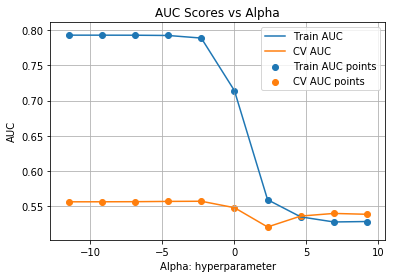

In [21]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
train_auc = []
cv_auc = []
for alpha in tqdm(alphas):
    clf = MultinomialNB(alpha=alpha, class_prior=[0.5,0.5])
    clf.fit(X_tr_tfidf, y_train)

    y_train_pred = batch_predict(clf, X_tr_tfidf)    
    y_cv_pred = batch_predict(clf, X_crv_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(np.log(alphas), train_auc, label='Train AUC')
plt.plot(np.log(alphas), cv_auc, label='CV AUC')

plt.scatter(np.log(alphas), train_auc, label='Train AUC points')
plt.scatter(np.log(alphas), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC Scores vs Alpha")
plt.grid()
plt.show()

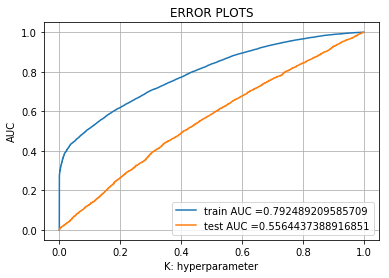

In [22]:
clf = MultinomialNB(alpha=0.01, class_prior=[0.5,0.5]) #AUC score for cv is highest at 0.00001
clf.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X_tr_tfidf)    
y_test_pred = batch_predict(clf, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [23]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print('Accuracy Score: ',accuracy_score(y_train, predict_with_best_t(y_train_pred, best_t)))
print('='*50)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print('Accuracy Score: ',accuracy_score(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4973160578020499 for threshold 0.498
Train confusion matrix
[[ 7737  2188]
 [20138 35485]]
Accuracy Score:  0.6593946420943431
Test confusion matrix
[[ 1657  1651]
 [ 7701 10841]]
Accuracy Score:  0.5719908466819222


In [24]:
# printing top 20 features for class 0 and class 1 for set2
max_ind_neg = np.argsort((clf.feature_log_prob_)[0][::-1])[:20]
max_ind_pos = np.argsort((clf.feature_log_prob_)[1][::-1])[:20]

top_neg=np.take(feature_names,max_ind_neg) 
print('Top 20 features for negative class')
print('='*50)
for feature in top_neg:
    print(feature)
print('='*50)
top_pos=np.take(feature_names,max_ind_pos) 
print('Top 20 features for positive class')
print('='*50)
for feature in top_pos:
    print(feature)

Top 20 features for negative class
reduced lunch 70
day definitely
science helps
day eager learn some
texas instruments ti
testing computer
job ready
science know
science music
day english half
job easier if not
science observations
telling kits
technology specialist
science olympiad
science pe
day five days
day free choice
day fun engaging
day fun exciting
Top 20 features for positive class
school welcome
marsh
toppings
far greater
level resources
understanding time
understanding surroundings constantly want
torso
spend day working
like stability balls
difficult would
classroom fun place learn
spend classroom time
spend class time working
looks items
boost need teachers
throughout day teach
look our
marshall islands
truly inspire


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [25]:
print('+------------+-------+------------------------+')
print('| Vectorizer | Model | Hyper Parameter |  AUC |')
print('+------------+-------+------------------------+')
print('|    BOW     | Brute |    0.00001      | 0.56 |')
print('+------------+-------+------------------------+')
print('|   TFIDF    | Brute |      0.01       | 0.56 |')
print('+------------+-------+------------------------+')

+------------+-------+------------------------+
| Vectorizer | Model | Hyper Parameter |  AUC |
+------------+-------+------------------------+
|    BOW     | Brute |    0.00001      | 0.56 |
+------------+-------+------------------------+
|   TFIDF    | Brute |      0.01       | 0.56 |
+------------+-------+------------------------+
